<a href="https://colab.research.google.com/github/RashmiAshara/Big_Data/blob/main/Big_Data_Analytics_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Analytics - Assignment 01 [Rashmi Ashara] [BSIT 231015]

### Step 1: Update and Upgrade the System Repositories

To ensure that the system has the latest available packages and dependencies, we first update and upgrade the repositories:

In [1]:
!apt update &> /dev/null  # Update package lists
!apt upgrade -y &> /dev/null  # Upgrade all installed packages


This will fetch the latest information from the repositories and update any outdated packages silently (the `&> /dev/null` suppresses output).

### Step 2: Verify if `pip` is Installed

Before proceeding with the installation of necessary packages, we check if `pip` is available on the system:

In [2]:
!pip --version  # Check the installed pip version

pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)


This ensures that the package installer for Python (`pip`) is ready to use.


### Step 3: Install PySpark and Required Dependencies


Next, we install `PySpark`, which is the Python API for Apache Spark. We also install `PyDrive`, which provides easy access to Google Drive, and any other dependencies:


In [3]:
!pip install pyspark --quiet  # Install PySpark
!pip install -U -q PyDrive --quiet  # Install or upgrade PyDrive silently


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


The `--quiet` flag suppresses the installation output, making the process less verbose.


### Step 4: Install OpenJDK 8


Apache Spark relies on Java, so we need to install **OpenJDK 8**. This installation is done in a headless mode (no GUI), as we don't need a graphical interface for the setup:

In [4]:
!apt install openjdk-8-jdk-headless &> /dev/null  # Install OpenJDK 8 in headless mode

This will install the Java Development Kit required for Spark without the unnecessary graphical components.

### Step 5: Set the `JAVA_HOME` Environment Variable


After installing Java, we need to set the `JAVA_HOME` environment variable to ensure Spark can locate Java. This step is crucial for Spark to work correctly:


In [5]:
import os

# Set the JAVA_HOME path
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Verify the environment variable
!echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


This ensures that the system knows where to find the Java installation, and the `echo $JAVA_HOME` command confirms that it's set correctly.


### Step 6: Initialize the Spark Session


With Java and PySpark set up, we now initialize a Spark session. The Spark session is the entry point to any Spark functionality. In this case, we configure it with an application name and a custom Spark UI port (4050):

In [6]:
from pyspark.sql import SparkSession

# Initialize SparkSession with custom configurations
spark = SparkSession \
    .builder \
    .appName("bigData") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Verify the Spark session initialization
spark

-   **`.appName("bigData")`**: Sets the name of the application (you can change `"bigData"` to any name you prefer).
    
-   **`.config("spark.ui.port", "4050")`**: Configures the Spark UI to run on port 4050. This can be useful if you're running multiple Spark jobs simultaneously and want to avoid port conflicts.

### Step 7: Verify the Spark Session


Finally, we print the `spark` object to verify that the Spark session has been correctly initialized. This object will allow us to interact with Spark through the PySpark API.


In [7]:
spark  # Display the Spark session details


### Step 8: Download the Dataset Using `wget`

To begin working with the dataset, we use the `wget` command to download the file from a given URL. In this case, the dataset is a CSV file:

In [10]:
!wget -O Dataset.csv https://raw.githubusercontent.com/RashmiAshara/Big_Data/main/family_anxiety_14_dataset.csv

--2025-09-28 18:17:16--  https://raw.githubusercontent.com/RashmiAshara/Big_Data/main/family_anxiety_14_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733671 (716K) [text/plain]
Saving to: ‘Dataset.csv’

Dataset.csv         100%[===================>] 716.48K  3.24MB/s    in 0.2s    

2025-09-28 18:17:17 (3.24 MB/s) - ‘Dataset.csv’ saved [733671/733671]



This command fetches the `Dataset.csv` file and stores it in the current working directory.

### Step 9: Verify the File Download


Once the file is downloaded, we can verify that it has been successfully saved by listing the files in the directory using the `ls` command:

In [13]:
!ls

Dataset.csv  sample_data


This will display a list of all files in the current directory, including `Dataset.csv` if the download was successful.

### Step 10: Load the Dataset Using Spark

Now, we load the dataset into a Spark DataFrame using the `spark.read.csv()` function. By specifying `header=True`, we tell Spark to treat the first row as column headers. The `sep=","` ensures that the file is treated as a CSV file (comma-separated values):

In [14]:
df = spark.read.csv('Dataset.csv', header=True, sep=",")

### Step 11: Display the Top 5 Rows

We can inspect the first few rows of the DataFrame using the `.show()` function. Here, we'll show the top 5 rows:

In [15]:
df.show(5)

+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+----------------------------+-----------------------+-------------------+--------------------+
|Age|Gender|Occupation|Sleep Hours|Physical Activity (hrs/week)|Caffeine Intake (mg/day)|Alcohol Consumption (drinks/week)|Smoking|Family History of Anxiety|Stress Level (1-10)|Heart Rate (bpm)|Breathing Rate (breaths/min)|Sweating Level (1-5)|Dizziness|Medication|Therapy Sessions (per month)|Recent Major Life Event|Diet Quality (1-10)|Anxiety Level (1-10)|
+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+---------------

This displays the first 5 rows of the dataset. If you wish to prevent the data from being truncated in the output (i.e., to see the entire row values), you can use:

In [16]:
df.show(5, truncate=False)

+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+----------------------------+-----------------------+-------------------+--------------------+
|Age|Gender|Occupation|Sleep Hours|Physical Activity (hrs/week)|Caffeine Intake (mg/day)|Alcohol Consumption (drinks/week)|Smoking|Family History of Anxiety|Stress Level (1-10)|Heart Rate (bpm)|Breathing Rate (breaths/min)|Sweating Level (1-5)|Dizziness|Medication|Therapy Sessions (per month)|Recent Major Life Event|Diet Quality (1-10)|Anxiety Level (1-10)|
+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+---------------

### Step 12: Limit to Top 5 Rows

Alternatively, if you want to fetch only the first 5 rows without displaying the full contents, you can use the `limit()` method:

In [17]:
df.limit(5)

DataFrame[Age: string, Gender: string, Occupation: string, Sleep Hours: string, Physical Activity (hrs/week): string, Caffeine Intake (mg/day): string, Alcohol Consumption (drinks/week): string, Smoking: string, Family History of Anxiety: string, Stress Level (1-10): string, Heart Rate (bpm): string, Breathing Rate (breaths/min): string, Sweating Level (1-5): string, Dizziness: string, Medication: string, Therapy Sessions (per month): string, Recent Major Life Event: string, Diet Quality (1-10): string, Anxiety Level (1-10): string]

This will return the first 5 rows as a DataFrame, but it will not display them automatically. You can then collect them to view:

In [ ]:
df.limit(5).collect()

### Step 13: Inspect the DataFrame's Columns and Data Types

To check the columns and their data types, you can use the following:

In [24]:
df.columns  # Returns a list of column names

['Age',
 'Gender',
 'Occupation',
 'Sleep Hours',
 'Physical Activity (hrs/week)',
 'Caffeine Intake (mg/day)',
 'Alcohol Consumption (drinks/week)',
 'Smoking',
 'Family History of Anxiety',
 'Stress Level (1-10)',
 'Heart Rate (bpm)',
 'Breathing Rate (breaths/min)',
 'Sweating Level (1-5)',
 'Dizziness',
 'Medication',
 'Therapy Sessions (per month)',
 'Recent Major Life Event',
 'Diet Quality (1-10)',
 'Anxiety Level (1-10)']

To inspect the data types of each column:

In [19]:
df.dtypes  # Returns a list of tuples (column name, column type)

[('Age', 'string'),
 ('Gender', 'string'),
 ('Occupation', 'string'),
 ('Sleep Hours', 'string'),
 ('Physical Activity (hrs/week)', 'string'),
 ('Caffeine Intake (mg/day)', 'string'),
 ('Alcohol Consumption (drinks/week)', 'string'),
 ('Smoking', 'string'),
 ('Family History of Anxiety', 'string'),
 ('Stress Level (1-10)', 'string'),
 ('Heart Rate (bpm)', 'string'),
 ('Breathing Rate (breaths/min)', 'string'),
 ('Sweating Level (1-5)', 'string'),
 ('Dizziness', 'string'),
 ('Medication', 'string'),
 ('Therapy Sessions (per month)', 'string'),
 ('Recent Major Life Event', 'string'),
 ('Diet Quality (1-10)', 'string'),
 ('Anxiety Level (1-10)', 'string')]

Finally, to inspect the schema in a more readable format:

In [20]:
df.printSchema()  # Prints the schema with column names and types

root
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Sleep Hours: string (nullable = true)
 |-- Physical Activity (hrs/week): string (nullable = true)
 |-- Caffeine Intake (mg/day): string (nullable = true)
 |-- Alcohol Consumption (drinks/week): string (nullable = true)
 |-- Smoking: string (nullable = true)
 |-- Family History of Anxiety: string (nullable = true)
 |-- Stress Level (1-10): string (nullable = true)
 |-- Heart Rate (bpm): string (nullable = true)
 |-- Breathing Rate (breaths/min): string (nullable = true)
 |-- Sweating Level (1-5): string (nullable = true)
 |-- Dizziness: string (nullable = true)
 |-- Medication: string (nullable = true)
 |-- Therapy Sessions (per month): string (nullable = true)
 |-- Recent Major Life Event: string (nullable = true)
 |-- Diet Quality (1-10): string (nullable = true)
 |-- Anxiety Level (1-10): string (nullable = true)



### Step 14: Enable Schema Inference

To ensure that Spark automatically infers the data types for each column, we can set `inferSchema=True` in the `csv()` method. This allows Spark to automatically determine the type of each column (e.g., integers, floats, strings):

In [21]:
df = spark.read.csv('Dataset.csv', header=True, sep=",", inferSchema=True)


After reading the data with schema inference, you can check the schema again with `printSchema()`:


In [22]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Sleep Hours: double (nullable = true)
 |-- Physical Activity (hrs/week): double (nullable = true)
 |-- Caffeine Intake (mg/day): integer (nullable = true)
 |-- Alcohol Consumption (drinks/week): integer (nullable = true)
 |-- Smoking: string (nullable = true)
 |-- Family History of Anxiety: string (nullable = true)
 |-- Stress Level (1-10): integer (nullable = true)
 |-- Heart Rate (bpm): integer (nullable = true)
 |-- Breathing Rate (breaths/min): integer (nullable = true)
 |-- Sweating Level (1-5): integer (nullable = true)
 |-- Dizziness: string (nullable = true)
 |-- Medication: string (nullable = true)
 |-- Therapy Sessions (per month): integer (nullable = true)
 |-- Recent Major Life Event: string (nullable = true)
 |-- Diet Quality (1-10): integer (nullable = true)
 |-- Anxiety Level (1-10): double (nullable = true)



### Step 15: Inspect DataFrame's Columns Again

To confirm the columns of the DataFrame, you can simply call:


In [23]:
df.columns  # List of column names

['Age',
 'Gender',
 'Occupation',
 'Sleep Hours',
 'Physical Activity (hrs/week)',
 'Caffeine Intake (mg/day)',
 'Alcohol Consumption (drinks/week)',
 'Smoking',
 'Family History of Anxiety',
 'Stress Level (1-10)',
 'Heart Rate (bpm)',
 'Breathing Rate (breaths/min)',
 'Sweating Level (1-5)',
 'Dizziness',
 'Medication',
 'Therapy Sessions (per month)',
 'Recent Major Life Event',
 'Diet Quality (1-10)',
 'Anxiety Level (1-10)']

### Step 16: Define Proper Schema and Re-load the Dataset

By default, Spark treats all values as `StringType` unless you enable `inferSchema=True`.

Let’s define an **explicit schema** for better data types (optional but useful for accuracy and performance):

In [25]:
from pyspark.sql.types import *

schema = StructType([
    StructField('Age', IntegerType(), True),
    StructField('Gender', StringType(), True),
    StructField('Occupation', StringType(), True),
    StructField('Sleep Hours', FloatType(), True),
    StructField('Physical Activity (hrs/week)', FloatType(), True),
    StructField('Caffeine Intake (mg/day)', IntegerType(), True),
    StructField('Alcohol Consumption (drinks/week)', IntegerType(), True),
    StructField('Smoking', StringType(), True),
    StructField('Family History of Anxiety', StringType(), True),
    StructField('Stress Level (1-10)', IntegerType(), True),
    StructField('Heart Rate (bpm)', IntegerType(), True),
    StructField('Breathing Rate (breaths/min)', IntegerType(), True),
    StructField('Sweating Level (1-5)', IntegerType(), True),
    StructField('Dizziness', StringType(), True),
    StructField('Medication', StringType(), True),
    StructField('Therapy Sessions (per month)', IntegerType(), True),
    StructField('Recent Major Life Event', StringType(), True),
    StructField('Diet Quality (1-10)', IntegerType(), True),
    StructField('Anxiety Level (1-10)', FloatType(), True)
])

df = spark.read.csv("Dataset.csv", header=True, schema=schema)
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Sleep Hours: float (nullable = true)
 |-- Physical Activity (hrs/week): float (nullable = true)
 |-- Caffeine Intake (mg/day): integer (nullable = true)
 |-- Alcohol Consumption (drinks/week): integer (nullable = true)
 |-- Smoking: string (nullable = true)
 |-- Family History of Anxiety: string (nullable = true)
 |-- Stress Level (1-10): integer (nullable = true)
 |-- Heart Rate (bpm): integer (nullable = true)
 |-- Breathing Rate (breaths/min): integer (nullable = true)
 |-- Sweating Level (1-5): integer (nullable = true)
 |-- Dizziness: string (nullable = true)
 |-- Medication: string (nullable = true)
 |-- Therapy Sessions (per month): integer (nullable = true)
 |-- Recent Major Life Event: string (nullable = true)
 |-- Diet Quality (1-10): integer (nullable = true)
 |-- Anxiety Level (1-10): float (nullable = true)



### Step 17: Show Sample Data

In [26]:
df.show(5, truncate=False)

+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+----------------------------+-----------------------+-------------------+--------------------+
|Age|Gender|Occupation|Sleep Hours|Physical Activity (hrs/week)|Caffeine Intake (mg/day)|Alcohol Consumption (drinks/week)|Smoking|Family History of Anxiety|Stress Level (1-10)|Heart Rate (bpm)|Breathing Rate (breaths/min)|Sweating Level (1-5)|Dizziness|Medication|Therapy Sessions (per month)|Recent Major Life Event|Diet Quality (1-10)|Anxiety Level (1-10)|
+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+---------------

### Step 18: Selecting Columns

Select specific column:

In [27]:
df.select("Occupation").show(5)

+----------+
|Occupation|
+----------+
|     Nurse|
|  Engineer|
|    Doctor|
|   Athlete|
|   Athlete|
+----------+
only showing top 5 rows



Select multiple columns:

In [28]:
df.select("Occupation", "Stress Level (1-10)", "Anxiety Level (1-10)").show(5)

+----------+-------------------+--------------------+
|Occupation|Stress Level (1-10)|Anxiety Level (1-10)|
+----------+-------------------+--------------------+
|     Nurse|                  1|                 3.0|
|  Engineer|                 10|                 4.0|
|    Doctor|                 10|                 6.0|
|   Athlete|                  4|                 2.0|
|   Athlete|                  3|                 4.0|
+----------+-------------------+--------------------+
only showing top 5 rows



### Step 19: Adding a Column (e.g., `Country = "Sri Lanka"`)

In [29]:
from pyspark.sql.functions import lit

df = df.withColumn("Country", lit("Sri Lanka"))
df.show(5)

+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+----------------------------+-----------------------+-------------------+--------------------+---------+
|Age|Gender|Occupation|Sleep Hours|Physical Activity (hrs/week)|Caffeine Intake (mg/day)|Alcohol Consumption (drinks/week)|Smoking|Family History of Anxiety|Stress Level (1-10)|Heart Rate (bpm)|Breathing Rate (breaths/min)|Sweating Level (1-5)|Dizziness|Medication|Therapy Sessions (per month)|Recent Major Life Event|Diet Quality (1-10)|Anxiety Level (1-10)|  Country|
+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+------

### Step 20: Renaming Columns

Suppose you want to rename `"Stress Level (1-10)"` to just `"Stress Level"`:


In [ ]:
df = df.withColumnRenamed("Stress Level (1-10)", "Stress Level")


You can do the same for other long column names to make analysis easier.


### Step 21: Drop Unneeded Columns


Let’s say we want to drop `Dizziness` and `Medication`:


In [ ]:
df = df.drop("Dizziness", "Medication")


### Step 22: Filter Rows


Filter people who sleep less than 6 hours:

In [30]:
from pyspark.sql.functions import col

df.filter(col("Sleep Hours") < 6).show()

+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+----------------------------+-----------------------+-------------------+--------------------+---------+
|Age|Gender|Occupation|Sleep Hours|Physical Activity (hrs/week)|Caffeine Intake (mg/day)|Alcohol Consumption (drinks/week)|Smoking|Family History of Anxiety|Stress Level (1-10)|Heart Rate (bpm)|Breathing Rate (breaths/min)|Sweating Level (1-5)|Dizziness|Medication|Therapy Sessions (per month)|Recent Major Life Event|Diet Quality (1-10)|Anxiety Level (1-10)|  Country|
+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+------

Filter people with stress level > 7 and caffeine intake > 300:

In [32]:
df.filter(
    (col("Stress Level (1-10)") > 7) & (col("Caffeine Intake (mg/day)") > 300)
).show()

+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+----------------------------+-----------------------+-------------------+--------------------+---------+
|Age|Gender|Occupation|Sleep Hours|Physical Activity (hrs/week)|Caffeine Intake (mg/day)|Alcohol Consumption (drinks/week)|Smoking|Family History of Anxiety|Stress Level (1-10)|Heart Rate (bpm)|Breathing Rate (breaths/min)|Sweating Level (1-5)|Dizziness|Medication|Therapy Sessions (per month)|Recent Major Life Event|Diet Quality (1-10)|Anxiety Level (1-10)|  Country|
+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+------

### Step 23: GroupBy and Aggregations

Count of people per occupation:

In [33]:
df.groupBy("Occupation").count().orderBy("count", ascending=False).show()


+----------+-----+
|Occupation|count|
+----------+-----+
| Scientist|  880|
|   Teacher|  871|
|    Artist|  870|
|  Engineer|  868|
|Freelancer|  864|
|     Other|  858|
|    Lawyer|  854|
|   Athlete|  847|
|     Nurse|  833|
|   Student|  826|
|    Doctor|  815|
|      Chef|  813|
|  Musician|  801|
+----------+-----+



Average anxiety level by gender:

In [34]:
df.groupBy("Gender").avg("Anxiety Level (1-10)").show()


+------+-------------------------+
|Gender|avg(Anxiety Level (1-10))|
+------+-------------------------+
|Female|        4.150496141124586|
| Other|         4.14031300593632|
|  Male|        4.157665030005456|
+------+-------------------------+



### Step 24: Sort Data

Sort by `Anxiety Level` descending:

In [35]:
df.orderBy(col("Anxiety Level (1-10)").desc()).show()


+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+----------------------------+-----------------------+-------------------+--------------------+---------+
|Age|Gender|Occupation|Sleep Hours|Physical Activity (hrs/week)|Caffeine Intake (mg/day)|Alcohol Consumption (drinks/week)|Smoking|Family History of Anxiety|Stress Level (1-10)|Heart Rate (bpm)|Breathing Rate (breaths/min)|Sweating Level (1-5)|Dizziness|Medication|Therapy Sessions (per month)|Recent Major Life Event|Diet Quality (1-10)|Anxiety Level (1-10)|  Country|
+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+------

### Step 25: Use Spark SQL

Register the DataFrame as a temp table:


In [36]:
df.createOrReplaceTempView("anxiety_data")


### Example SQL queries:

In [37]:
spark.sql("SELECT * FROM anxiety_data WHERE `Sleep Hours` < 6").show()
spark.sql("SELECT AVG(`Anxiety Level (1-10)`) as avg_anxiety FROM anxiety_data").show()

+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+----------+----------------------------+-----------------------+-------------------+--------------------+---------+
|Age|Gender|Occupation|Sleep Hours|Physical Activity (hrs/week)|Caffeine Intake (mg/day)|Alcohol Consumption (drinks/week)|Smoking|Family History of Anxiety|Stress Level (1-10)|Heart Rate (bpm)|Breathing Rate (breaths/min)|Sweating Level (1-5)|Dizziness|Medication|Therapy Sessions (per month)|Recent Major Life Event|Diet Quality (1-10)|Anxiety Level (1-10)|  Country|
+---+------+----------+-----------+----------------------------+------------------------+---------------------------------+-------+-------------------------+-------------------+----------------+----------------------------+--------------------+---------+------

### Step 26: Convert to Pandas for Plotting

If you want to visualize `Anxiety Level`, e.g., distribution:


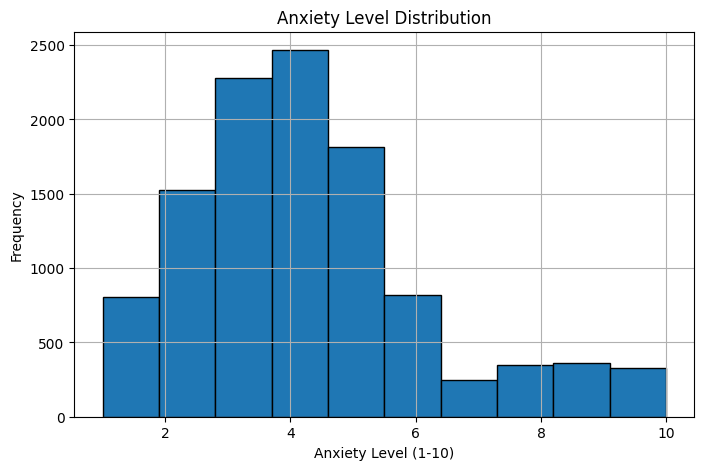

In [38]:
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame
pandas_df = df.select("Anxiety Level (1-10)").toPandas()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(pandas_df["Anxiety Level (1-10)"], bins=10, edgecolor='black')
plt.title("Anxiety Level Distribution")
plt.xlabel("Anxiety Level (1-10)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Step 27: Check Min/Max

In [39]:
from pyspark.sql.functions import min, max

df.select(
    min("Anxiety Level (1-10)").alias("Min Anxiety"),
    max("Anxiety Level (1-10)").alias("Max Anxiety")
).show()

+-----------+-----------+
|Min Anxiety|Max Anxiety|
+-----------+-----------+
|        1.0|       10.0|
+-----------+-----------+



### Step 28: **Union** and **Intersection** in PySpark

#### **Union** Operation:

The `union()` operation combines two DataFrames, keeping all records from both. It **removes duplicates** only when we explicitly call `distinct()`.

#### **Intersection** Operation:

The `intersection()` operation returns the common records between two DataFrames.

### **Step 28.1: Creating Sample DataFrames for Union and Intersection**

We will create two DataFrames to demonstrate both operations. Let's say we want to compare two DataFrames based on `Age` and `Anxiety Level`:

In [40]:
# Create sample DataFrames for demonstration
data1 = [(25, 5), (30, 7), (35, 6), (40, 8)]
data2 = [(30, 7), (35, 6), (45, 9), (50, 4)]

columns = ['Age', 'Anxiety Level (1-10)']

df1 = spark.createDataFrame(data1, columns)
df2 = spark.createDataFrame(data2, columns)

# Show the data
df1.show()
df2.show()

+---+--------------------+
|Age|Anxiety Level (1-10)|
+---+--------------------+
| 25|                   5|
| 30|                   7|
| 35|                   6|
| 40|                   8|
+---+--------------------+

+---+--------------------+
|Age|Anxiety Level (1-10)|
+---+--------------------+
| 30|                   7|
| 35|                   6|
| 45|                   9|
| 50|                   4|
+---+--------------------+



### **Step 28.2: **Union** - Combine Two DataFrames**


You can **union** two DataFrames with matching schemas:


In [41]:
# Union operation (without distinct)
df_union = df1.union(df2)
df_union.show()

# Union operation (with distinct to remove duplicates)
df_union_distinct = df1.union(df2).distinct()
df_union_distinct.show()

+---+--------------------+
|Age|Anxiety Level (1-10)|
+---+--------------------+
| 25|                   5|
| 30|                   7|
| 35|                   6|
| 40|                   8|
| 30|                   7|
| 35|                   6|
| 45|                   9|
| 50|                   4|
+---+--------------------+

+---+--------------------+
|Age|Anxiety Level (1-10)|
+---+--------------------+
| 30|                   7|
| 25|                   5|
| 35|                   6|
| 40|                   8|
| 50|                   4|
| 45|                   9|
+---+--------------------+



### **Step 28.3: **Intersection** - Find Common Records**

Now, let's perform the **intersection** to find the common records between `df1` and `df2`:

In [43]:
df_intersection = df1.join(df2, on=['Age', 'Anxiety Level (1-10)'], how='inner')
df_intersection.show()

+---+--------------------+
|Age|Anxiety Level (1-10)|
+---+--------------------+
| 30|                   7|
| 35|                   6|
+---+--------------------+



### Step 29: **Visualize Union and Intersection**

We'll now plot the results of **Union** and **Intersection** using `matplotlib`.

#### **Union Chart**

We will visualize the **unique data points** from the union of both DataFrames.


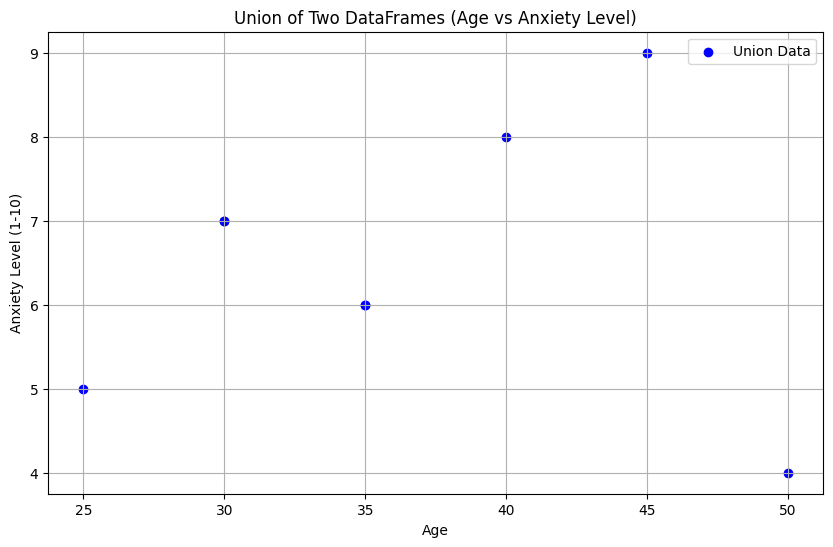

In [44]:
import matplotlib.pyplot as plt

# Convert the DataFrames to Pandas for plotting
df_union_pd = df_union.toPandas()

# Plot Union
plt.figure(figsize=(10, 6))
plt.scatter(df_union_pd['Age'], df_union_pd['Anxiety Level (1-10)'], color='blue', label='Union Data')
plt.title('Union of Two DataFrames (Age vs Anxiety Level)')
plt.xlabel('Age')
plt.ylabel('Anxiety Level (1-10)')
plt.legend()
plt.grid(True)
plt.show()

#### **Intersection Chart**

Now, let's plot the **common data points** from the intersection.

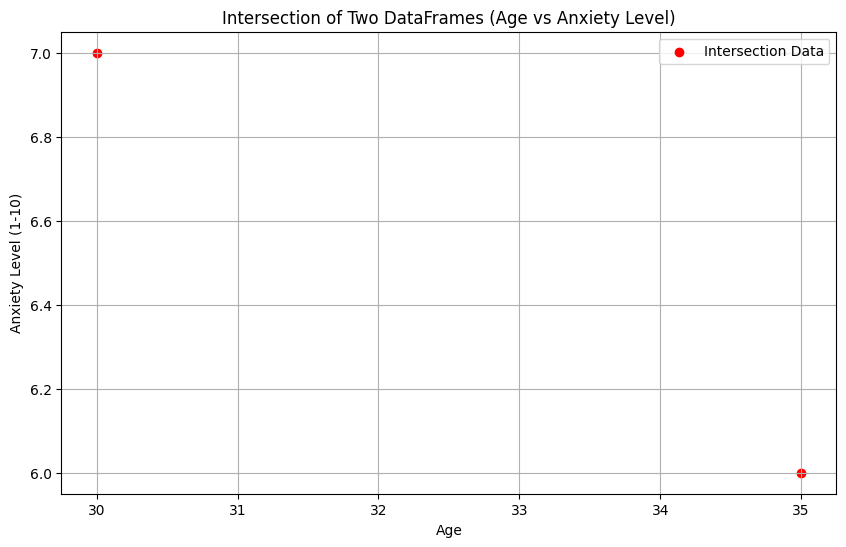

In [45]:
# Convert the DataFrame to Pandas for plotting
df_intersection_pd = df_intersection.toPandas()

# Plot Intersection
plt.figure(figsize=(10, 6))
plt.scatter(df_intersection_pd['Age'], df_intersection_pd['Anxiety Level (1-10)'], color='red', label='Intersection Data')
plt.title('Intersection of Two DataFrames (Age vs Anxiety Level)')
plt.xlabel('Age')
plt.ylabel('Anxiety Level (1-10)')
plt.legend()
plt.grid(True)
plt.show()

Install the matplotlib-venn library

In [46]:
!pip install matplotlib-venn


### Step 30: Creating Venn Diagram for Union and Intersection

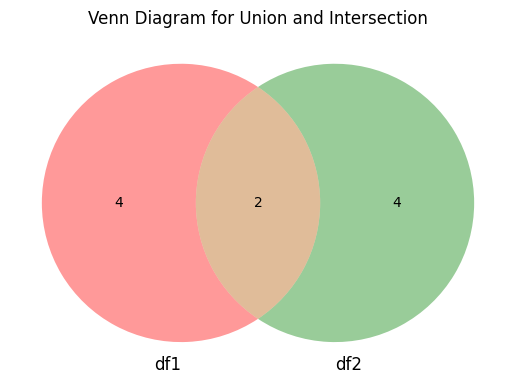

In [47]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Get the number of rows in each DataFrame and the intersection
union_count = df1.union(df2).distinct().count()
intersection_count = df1.join(df2, on=['Age', 'Anxiety Level (1-10)'], how='inner').count()
df1_count = df1.count()
df2_count = df2.count()

# Create a Venn diagram with two sets
venn2(subsets=(df1_count, df2_count, intersection_count),
      set_labels=('df1', 'df2'))

# Title and plot
plt.title("Venn Diagram for Union and Intersection")
plt.show()
